In [1]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
mec2 = sc.m_e * sc.c**2 / sc.e
λ = 1e-4
ω = 2*sc.pi*sc.c/λ
k = ω/sc.c
print(f'k = {0.01*k:.2f}/cm')
λU = 0.1
kU = 2*sc.pi/λU
E_kin = 30.0e6
γ = E_kin / mec2 + 1
print(f'γ = {γ:.3f}')
K = np.sqrt(2.0*(λ/λU * 2*γ**2 -1.0))
print(f'K = {K:.3f}')

k = 628.32/cm
γ = 59.709
K = 3.501


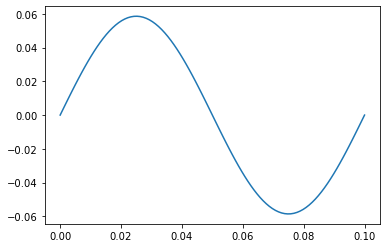

In [3]:
βx = lambda z: K/γ * np.sin(kU*z)

z_range = np.linspace(0,λU,100)
plt.plot(z_range,βx(z_range))
plt.show()

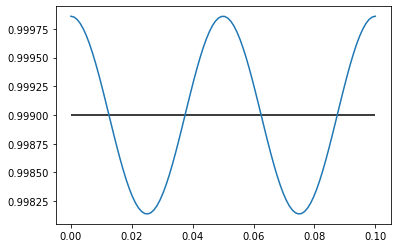

In [4]:
βz = lambda z: np.sqrt(1.0 - 1.0/γ**2 - βx(z)**2)
βz_star = 1.0 - λ/λU

plt.plot(z_range,βz(z_range))
plt.hlines(βz_star,0,λU)
plt.show()

In [5]:
f = lambda z: 1.0/βz(z)
ct = lambda z: scipy.integrate.quad(f, 0, z)[0]

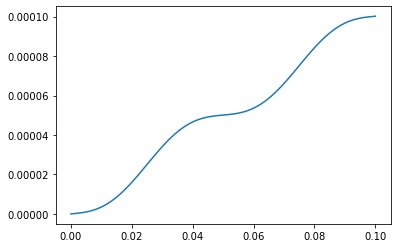

In [6]:
ct_range = np.array([ct(z) for z in z_range])
plt.plot(z_range,ct_range-z_range)
plt.show()

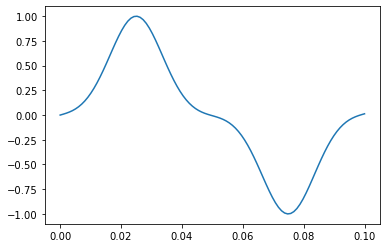

In [7]:
Ex = lambda z: np.sin(k*ct(z) - k*z)

Ex_range = np.array([Ex(z) for z in z_range])
plt.plot(z_range,Ex_range)
plt.show()

In [8]:
f2 = lambda z: np.sin(kU*z)*Ex(z)
FF = scipy.integrate.quad(f2, 0, λU)[0] / λU
FF

0.37106020038189647

In [9]:
E0 = 1e6
Δγ = sc.e/(sc.m_e*sc.c**2)*E0*K/γ*λU*FF
print(f'Δγ = {Δγ:.6f}')

Δγ = 0.004258


In [28]:
! ./build/teufel tests/fel_modulation.xml


 TEUFEL 0.10.01

 THz-Emission From Undulators and Free-Electron Lasers


 TEUFEL parallel computing on 1 nodes.

node 0 : fwl57 PID=3911069 total memory 32634.3 MB using 20 parallel threads
node 0 memory usage : 212.812 MB

reading XML input from tests/fel_modulation.xml
input parsed without errors
case : Energy modulation of an electron beam by FEL interaction with an electromagnetic wave inside an undulator
by : Ulf Lehnert 23.4.2023

calc : beam kinetic energy [eV] = 3e+07
calc : gamma = 59.7085
calc : resonance wavelength [m] = 0.0001
calc : tracking length [m] = 2.0014
calc : tracking total time [s] = 6.67595e-09
calc : dt = 1.66899e-12
calc : K(U100) = 3.50149
U100::PlanarUndulator
calc : K(U100) = 3.50149
planar undulator  N = 14,  lambda = 0.1,  K(rms) = 2.47593
calc : Rayleigh range [m] = 100
calc : waist radius w0 [m] = 0.056419
calc : peak field E0 [V/m] = 1e+06
seed::GaussianWave
gaussian wave  E0 = 1e+06 V/m   w0 = 0.056419 m   Ptot = 6.63605e+06 W

lattice of 2 elements

In [32]:
initial = TeufelWatch.read('fel-modulation_initial.h5')
print(np.mean(initial.z))
z_plot = initial.z
print()
final = TeufelWatch.read('fel-modulation_final.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_initial.h5
have read 500 particles.
3.478523582985833e-06

reading  fel-modulation_final.h5
have read 500 particles.
1.9999341875444958

-0.06008505364310679 0.060119642518465355


In [33]:
initial = TeufelWatch.read('fel-modulation_start.h5')
print(np.mean(initial.z))
print()
final = TeufelWatch.read('fel-modulation_stop.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_start.h5
have read 500 particles.
0.5001196706539638

reading  fel-modulation_stop.h5
have read 500 particles.
1.4998181027487234

-0.04274832059423517 0.04271462442491725


-0.04274832059423517 0.04271462442491725


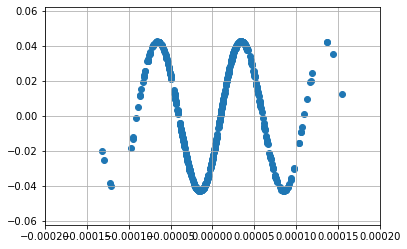

In [34]:
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

plt.scatter(z_plot,dg)
plt.xlim(-0.0002, 0.0002)
plt.grid()
plt.show()